# Import Packages

In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# For Prediction:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
# For nice Plots
%matplotlib inline
plt.style.use('default')

# Read in the Data

In [2]:
dir_path = os.path.abspath("")
fname = dir_path+'\countrydf.csv'
countrydf = pd.read_csv(fname, encoding='latin-1')
countrydf = countrydf.drop(["Country", "Year"],axis=1)

# Prediction:

In [3]:
# Build a test set and training set

cols_to_standardize = countrydf.columns.drop(['Future Undernourishment'])
scaler = StandardScaler()
countrydf[cols_to_standardize] = scaler.fit_transform(countrydf[cols_to_standardize])

# Print the standardized dataframe
print(countrydf)

X_train, X_test, y_train, y_test = train_test_split(
  countrydf.drop(["Future Undernourishment"], axis=1), countrydf["Future Undernourishment"], test_size=1/3, random_state = 42)

# Replace all the NaNs with the column mean, 
# and build the test set and training set using the indicies from the first set
countrydf2 = countrydf.fillna(countrydf.mean())
# Build a test set and training set
X_train2 = countrydf2.drop(["Future Undernourishment"], axis=1).iloc[X_train.index]
X_test2 = countrydf2.drop(["Future Undernourishment"], axis=1).iloc[X_test.index]
y_train2 = countrydf2["Future Undernourishment"].iloc[y_train.index]
y_test2 = countrydf2["Future Undernourishment"].iloc[y_test.index]

# Use only rows with non-NaN response variable, then replace all the NaNs with the column mean 
# and build the test set and training set using the indicies from the first set
keep_indices_test = np.where(y_test.notna())
keep_indices_train = np.where(y_train.notna())
# Build a test set and training set
X_train3 = X_train2.iloc[keep_indices_train]
X_test3 = X_test2.iloc[keep_indices_test]
y_train3 = y_train2.iloc[keep_indices_train]
y_test3 = y_test2.iloc[keep_indices_test]

      Unnamed: 0   level_0     index  \
0      -1.730448 -1.735120 -1.732732   
1      -1.727240 -1.731986 -1.729883   
2      -1.724033 -1.728851 -1.727033   
3      -1.720825 -1.725717 -1.724184   
4      -1.717618 -1.722583 -1.721334   
...          ...       ...       ...   
1075    1.717618  1.697043  1.695225   
1076    1.720825  1.700177  1.698074   
1077    1.724033  1.703312  1.700924   
1078    1.727240  1.706446  1.703773   
1079    1.730448  1.709581  1.712322   

      Average dietary energy supply adequacy (percent) (3-year average)  \
0                                              1.031639                   
1                                              1.169786                   
2                                              1.238859                   
3                                              1.238859                   
4                                              1.307932                   
...                                                 ...              

## 0. Baseline: Using previous year's undernouishment to predict next year

In [4]:
Future_Undernourishment_Col_Name = "Prevalence of undernourishment (percent) (3-year average)"
y_hat_baseline = X_test[Future_Undernourishment_Col_Name]*0
RMSE_baseline = np.sqrt((np.sum(y_hat_baseline-y_test)**2)/len(y_hat_baseline))
print("Baseline RMSE: "+str(RMSE_baseline))

Baseline RMSE: 4.295427155062048


In [5]:
y_hat_baseline2 = X_test2[Future_Undernourishment_Col_Name]*0
RMSE_baseline2 = np.sqrt((np.sum(y_hat_baseline2-y_test2)**2)/len(y_hat_baseline2))
print("Baseline RMSE2 (replacing all NaNs with mean): "+str(RMSE_baseline2))

Baseline RMSE2 (replacing all NaNs with mean): 5.370450254368093


In [6]:
y_hat_baseline3 = X_test3[Future_Undernourishment_Col_Name]*0
RMSE_baseline3 = np.sqrt((np.sum(y_hat_baseline3-y_test3)**2)/len(y_hat_baseline3))
print("Baseline RMSE3 (removing NaN in repsonse, then replacing all NaNs with mean): "+str(RMSE_baseline3))

Baseline RMSE3 (removing NaN in repsonse, then replacing all NaNs with mean): 4.932604391250738


## 1. Random Forest

In [7]:
# Build a random forest (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
regr = RandomForestRegressor(random_state = 42)
# Train on the training set
regr.fit(X_train2, y_train2)
# predict using the test set
y_hat_RF2 = regr.predict(X_test2)
# Compute the RMSE error
RMSE_RF2 = np.sqrt((np.sum(y_hat_RF2-y_test2)**2)/len(y_hat_RF2))
print("Baseline RMSE2: "+str(RMSE_baseline2))
print("Random Forest RMSE2: "+str(RMSE_RF2))

Baseline RMSE2: 5.370450254368093
Random Forest RMSE2: 0.10703351613712318


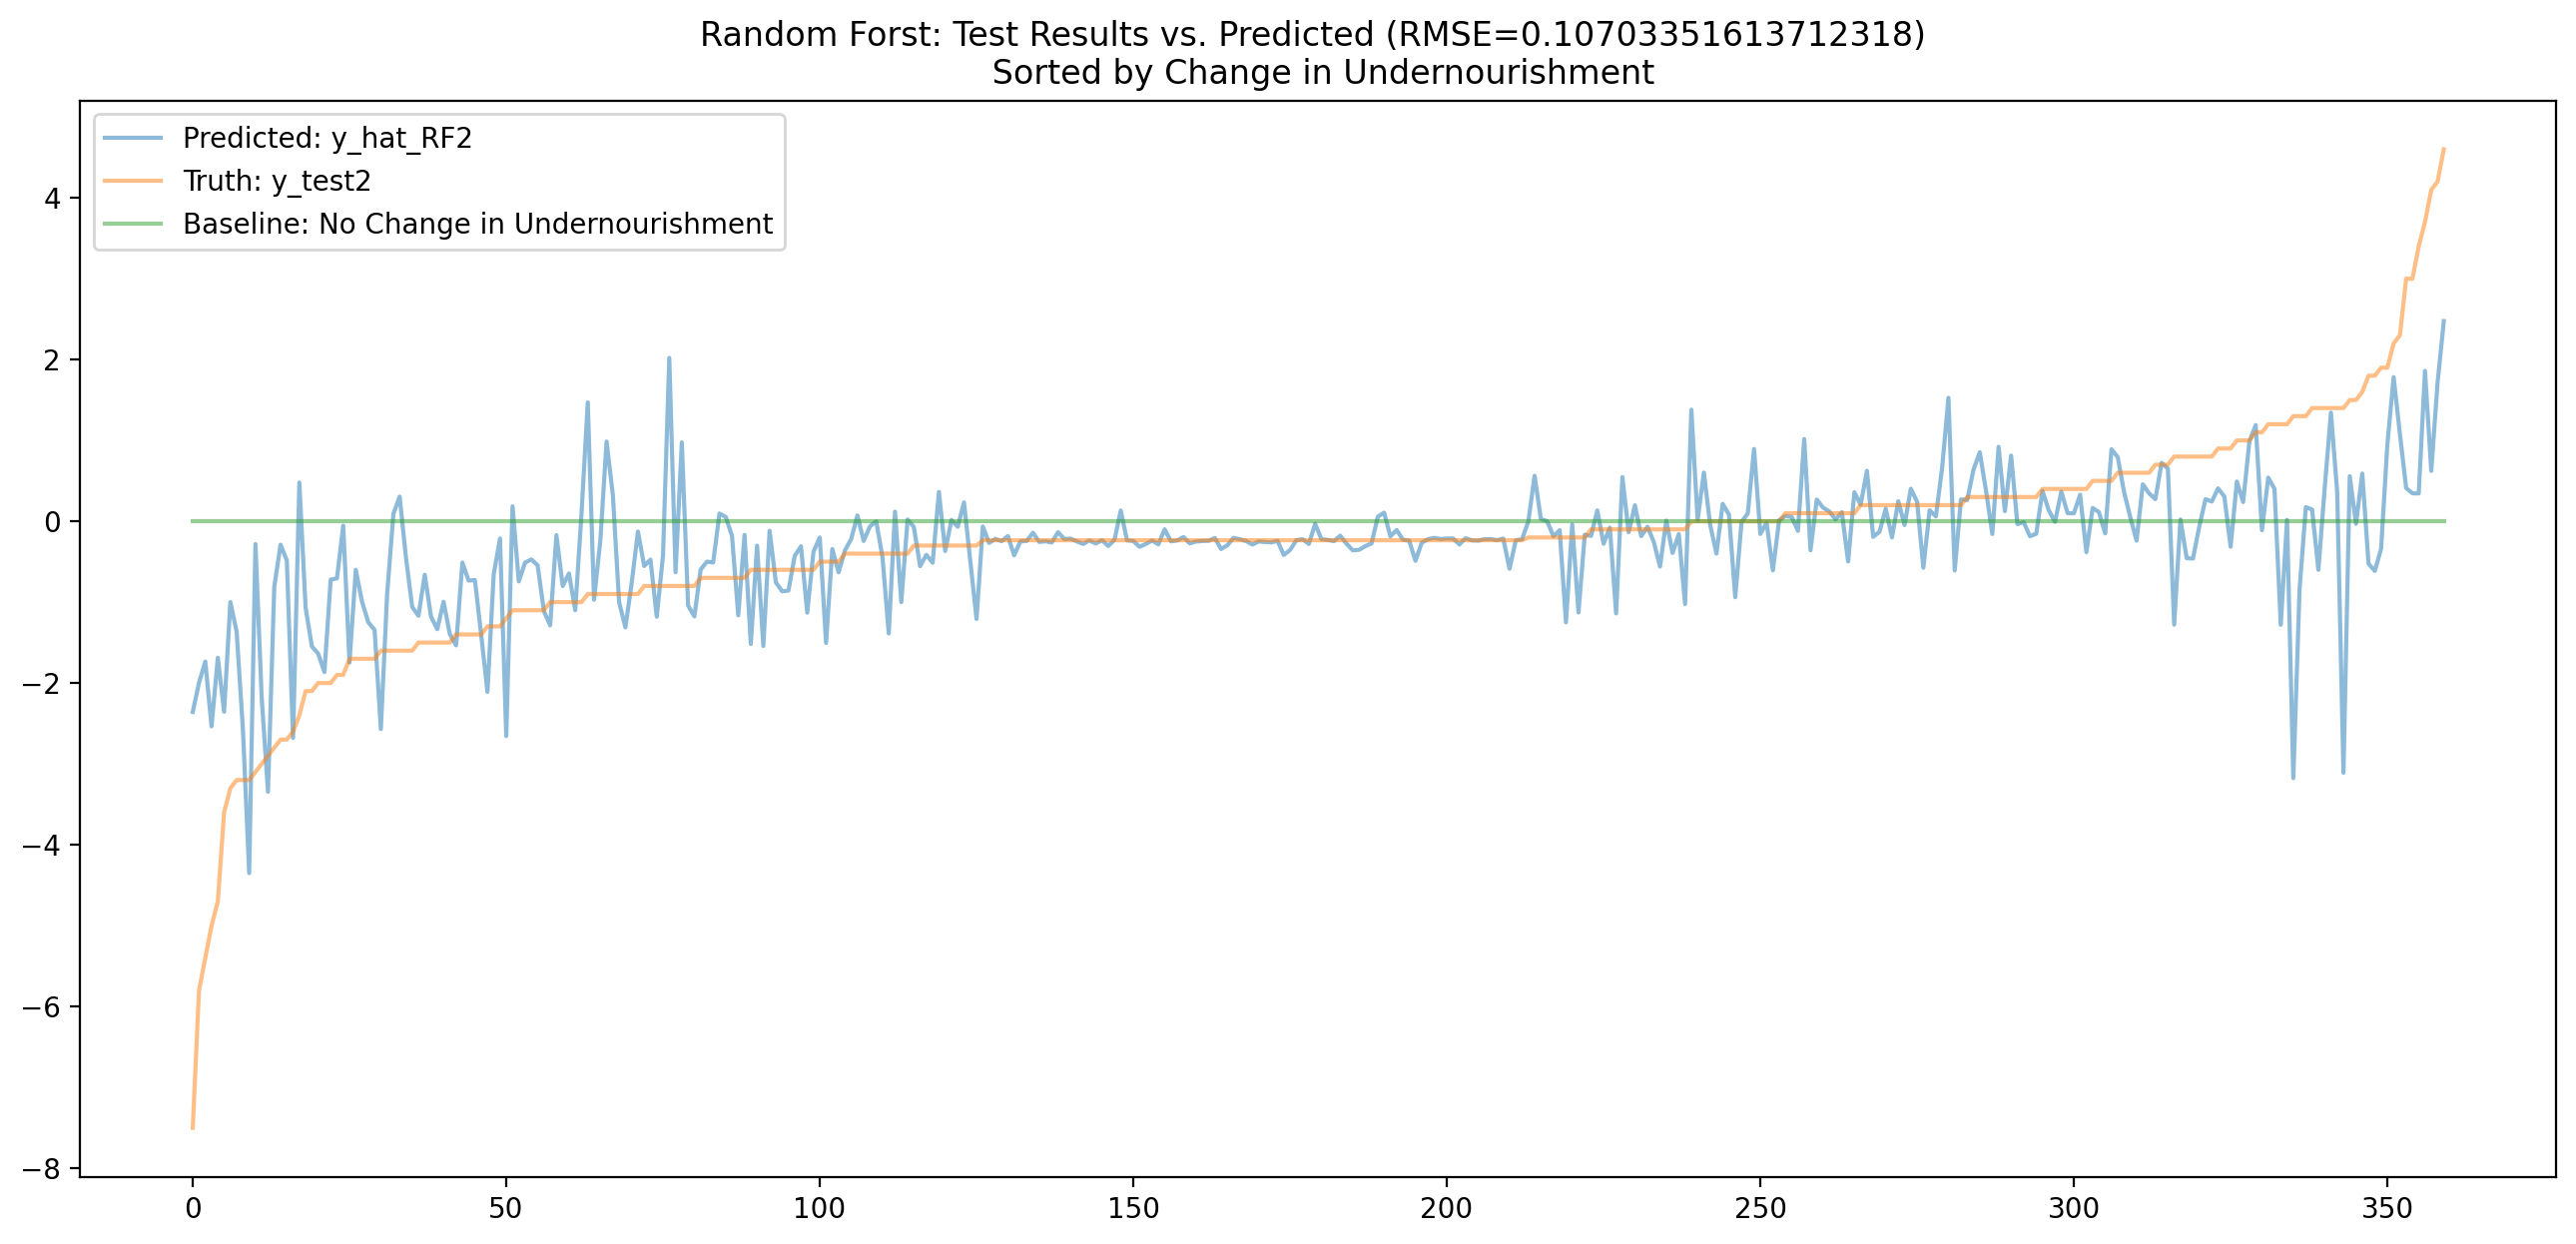

In [8]:
sorted_Idx = np.argsort(y_test2.to_numpy())
plt.figure(figsize=(16, 7), dpi=200)
plt.plot(y_hat_RF2[sorted_Idx], label='Predicted: y_hat_RF2', alpha=0.5)
plt.plot(y_test2.to_numpy()[sorted_Idx], label='Truth: y_test2', alpha=0.5)
plt.plot(y_hat_baseline2.to_numpy()[sorted_Idx], label='Baseline: No Change in Undernourishment', alpha=0.5)
plt.title("Random Forst: Test Results vs. Predicted (RMSE="+str(RMSE_RF2)+") \n Sorted by Change in Undernourishment")
plt.legend();

In [9]:
# Build a random forest (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
# Train on the training set
regr.fit(X_train3, y_train3)
# predict using the test set
y_hat_RF3 = regr.predict(X_test3)
# Compute the RMSE error
RMSE_RF3 = np.sqrt((np.sum(y_hat_RF3-y_test3)**2)/len(y_hat_RF3))
print("Baseline RMSE3: "+str(RMSE_baseline3))
print("Random Forest RMSE3: "+str(RMSE_RF3))

Baseline RMSE3: 4.932604391250738
Random Forest RMSE3: 0.05574145575879709


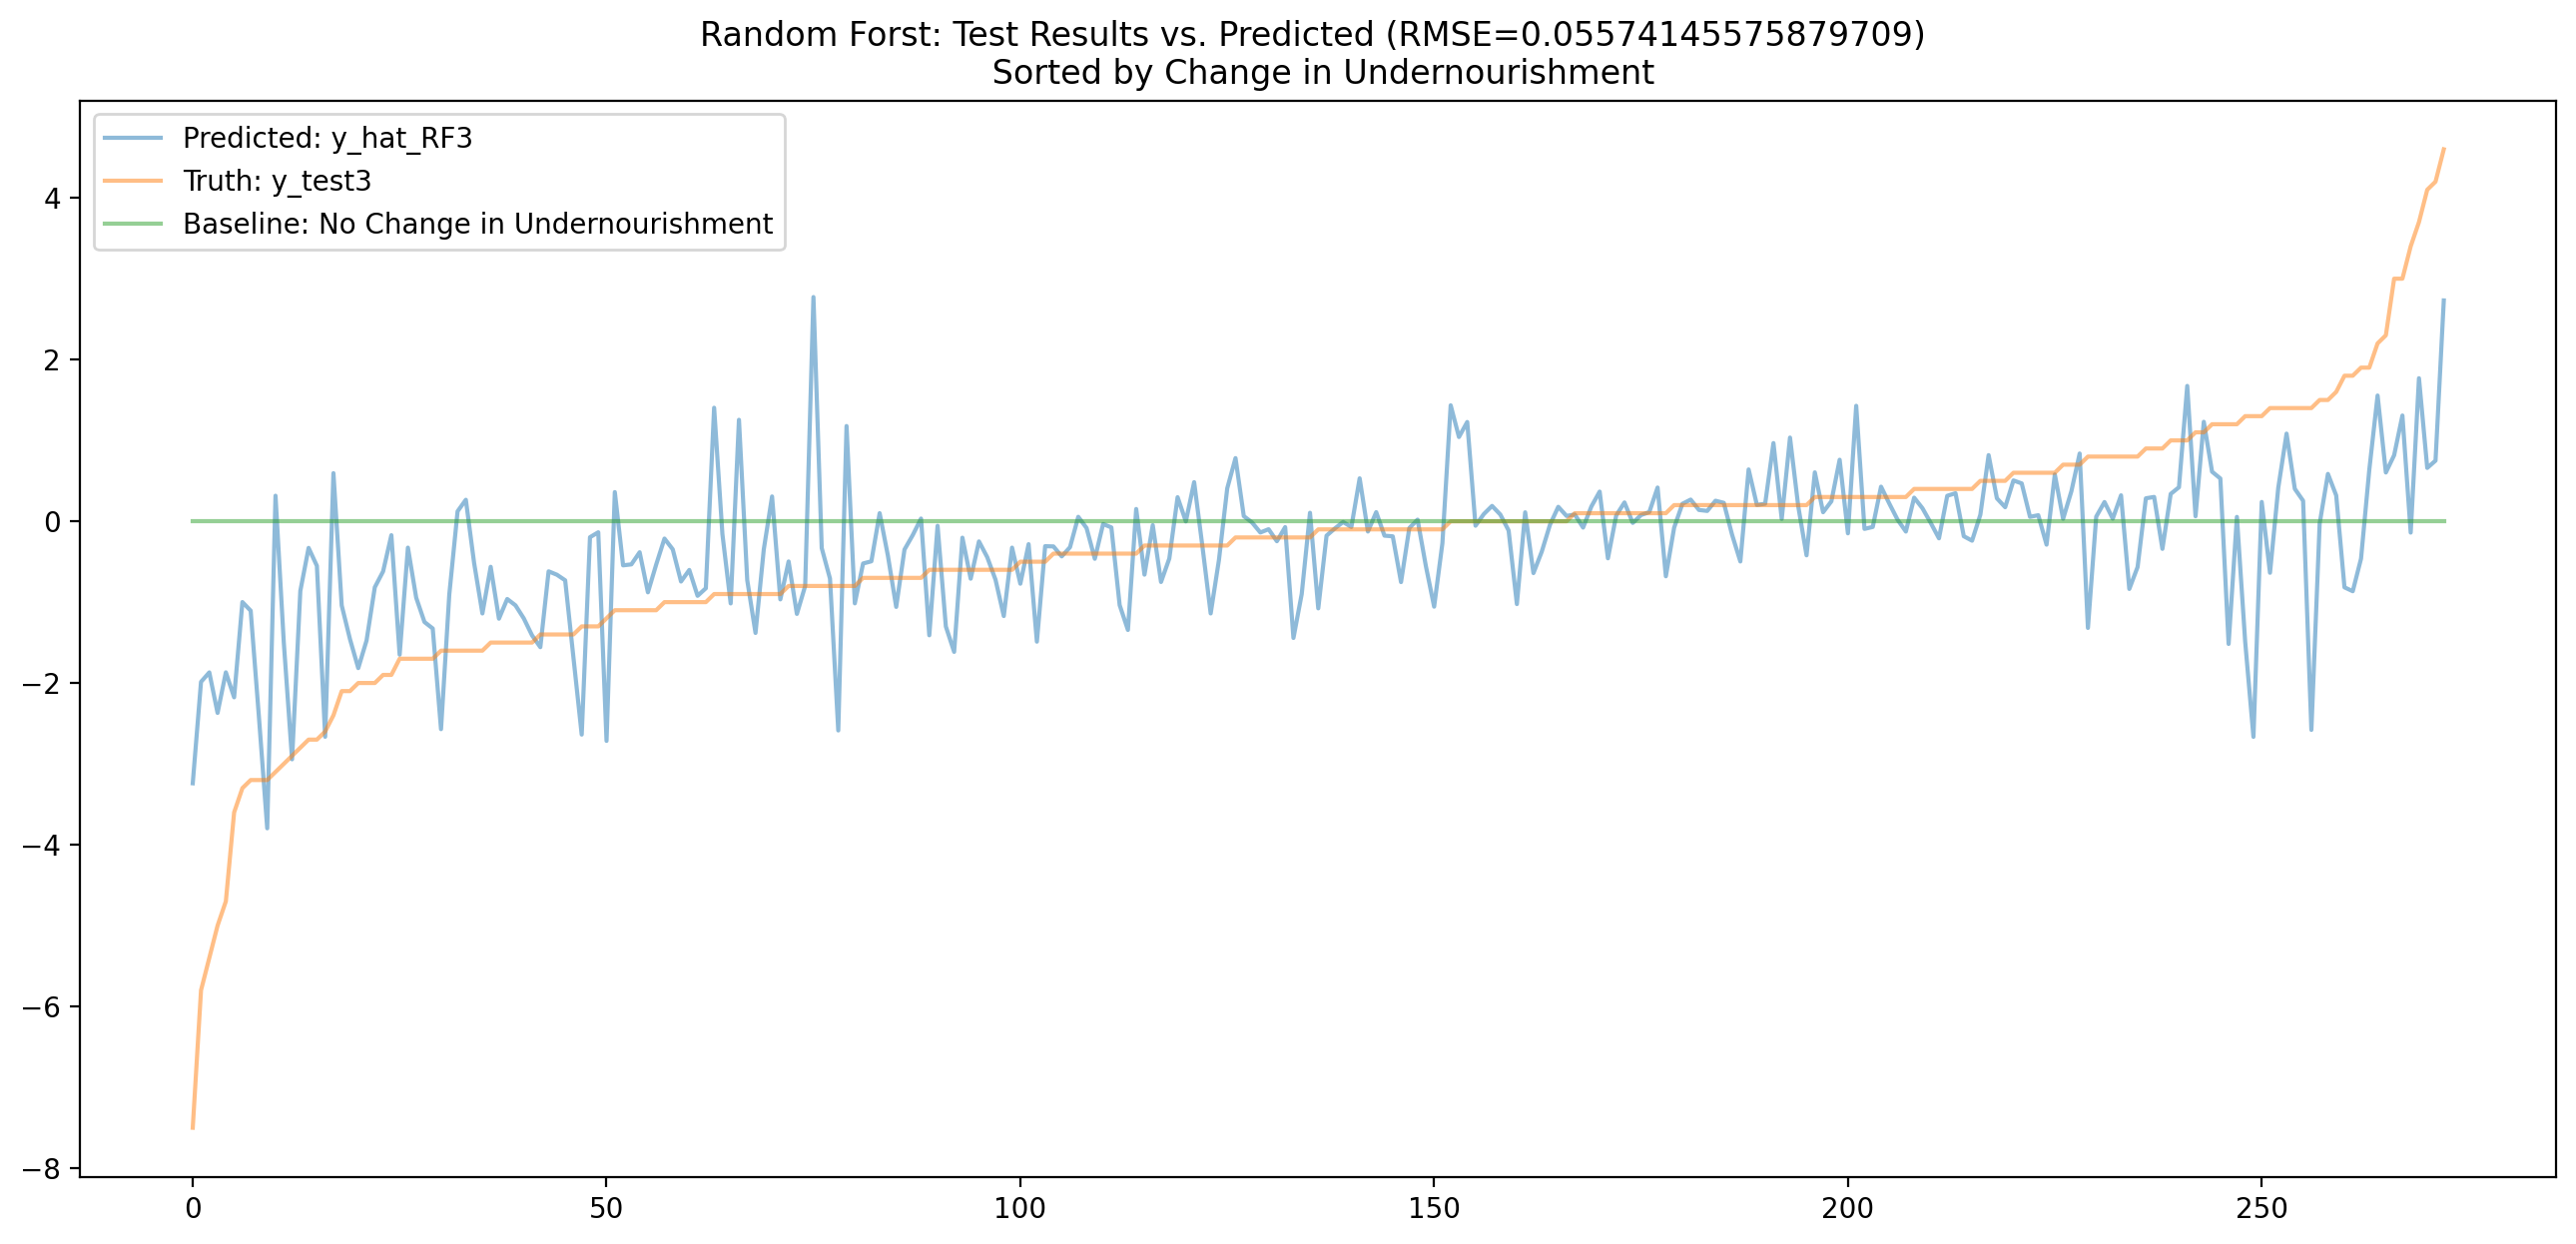

In [10]:
sorted_Idx = np.argsort(y_test3.to_numpy())
plt.figure(figsize=(16, 7), dpi=200)
plt.plot(y_hat_RF3[sorted_Idx], label='Predicted: y_hat_RF3', alpha=0.5)
plt.plot(y_test3.to_numpy()[sorted_Idx], label='Truth: y_test3', alpha=0.5)
plt.plot(y_hat_baseline3.to_numpy()[sorted_Idx], label='Baseline: No Change in Undernourishment', alpha=0.5)
plt.title("Random Forst: Test Results vs. Predicted (RMSE="+str(RMSE_RF3)+") \n Sorted by Change in Undernourishment")
plt.legend();

# Feature Importance

In [11]:
secFet = countrydf.drop(["Future Undernourishment"], axis=1).columns

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


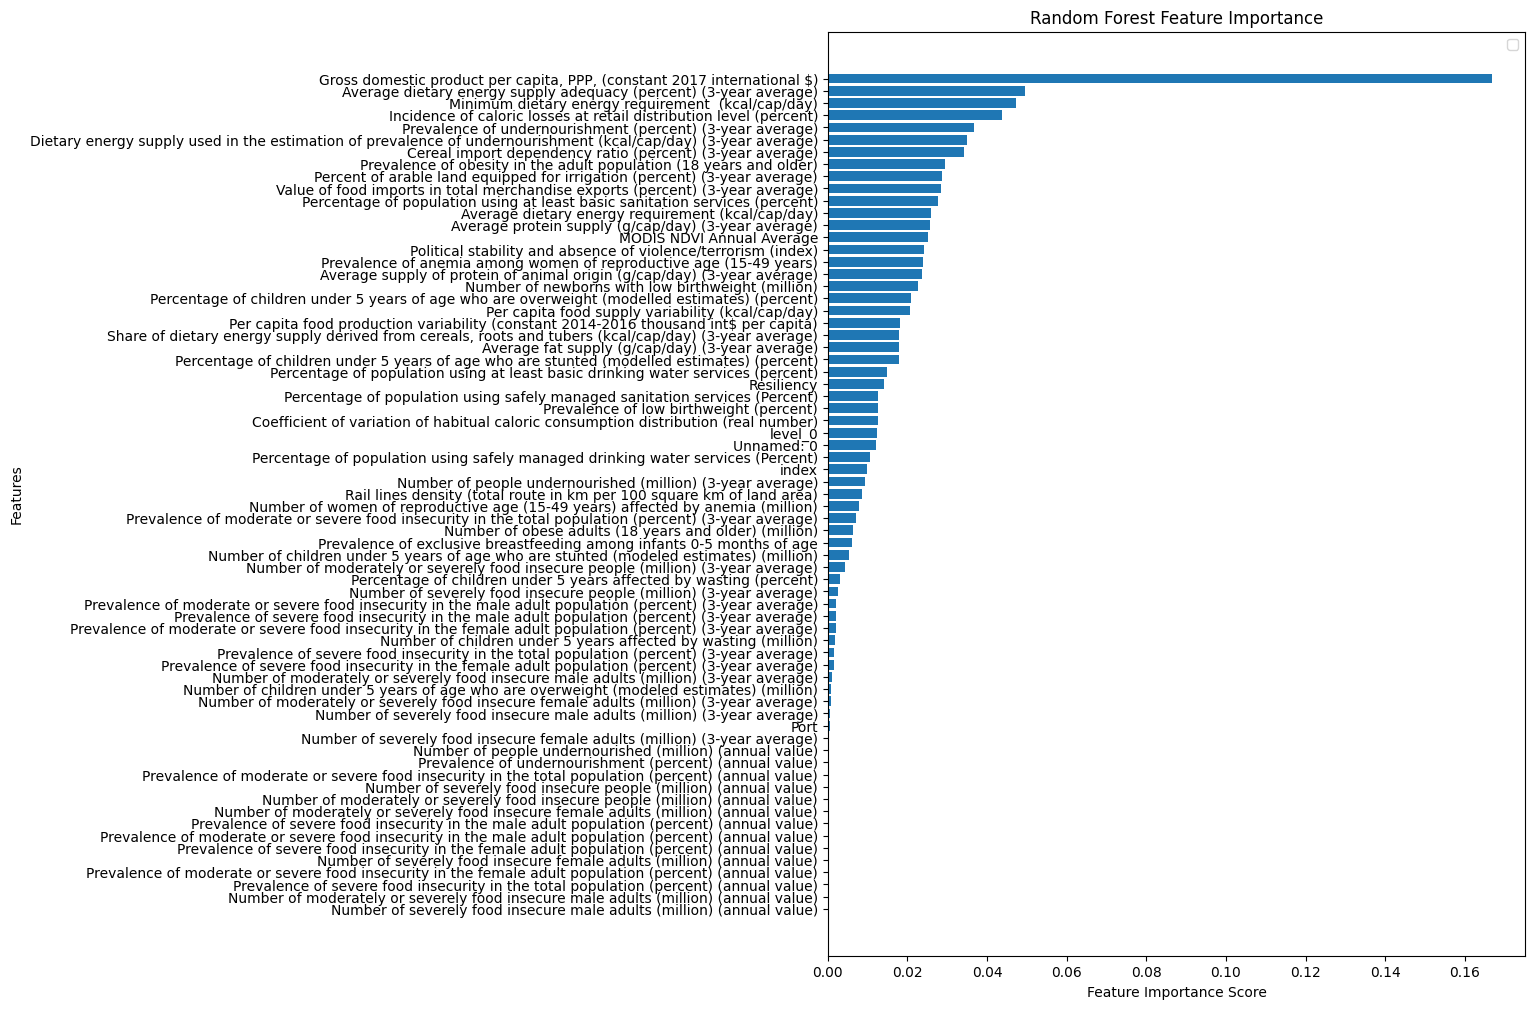

In [12]:
#plt.barh(secFet, regr.feature_importances_)
#Create the axis Labels
secFet = countrydf.drop(["Future Undernourishment"], axis=1).columns
#Develope Feature Importance
fig, ax = plt.subplots(figsize=(9, 12))
#Sort High to low
sorted_regr = regr.feature_importances_.argsort()
#Drop the bottom 50 Features
#sorted_regr = sorted_regr[50:]
#Plot the Feature Importance
ax.barh(secFet[sorted_regr], regr.feature_importances_[sorted_regr])
#plt.barh(secFet[sorted_regr], regr.feature_importances_[sorted_regr])
plt.title("Random Forest Feature Importance")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.legend()
plt.show()